In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection as ms
import seaborn as sns

# Synthetic Regression Data

In [2]:
# Função para aplicar a lei oculta a um vetor
hidden_law = np.vectorize(lambda x: math.sin(2 * math.pi * x))

# Criando um array de valores de 0 a 1 com incrementos de 0.01
x_all = np.arange(0, 1, 0.01)

# Aplicando a função hidden_law a todos os valores de x_all para obter y_hidden
y_hidden = hidden_law(x_all)

A variável hidden_law é definida como uma função vetorizada (usando np.vectorize) que aplica a operação math.sin(2 * math.pi * x) a cada elemento de um vetor de entrada. Esta operação calcula o seno de 2πx, que é uma função periódica.

A função hidden_law é então aplicada ao array x_all, resultando no array y_hidden, que contém os valores do seno de 2πx para cada ponto em x_all. Esses valores representam os dados sintéticos gerados a partir da função senoidal oculta.

In [3]:
x_all

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [4]:
y_hidden

array([ 0.00000000e+00,  6.27905195e-02,  1.25333234e-01,  1.87381315e-01,
        2.48689887e-01,  3.09016994e-01,  3.68124553e-01,  4.25779292e-01,
        4.81753674e-01,  5.35826795e-01,  5.87785252e-01,  6.37423990e-01,
        6.84547106e-01,  7.28968627e-01,  7.70513243e-01,  8.09016994e-01,
        8.44327926e-01,  8.76306680e-01,  9.04827052e-01,  9.29776486e-01,
        9.51056516e-01,  9.68583161e-01,  9.82287251e-01,  9.92114701e-01,
        9.98026728e-01,  1.00000000e+00,  9.98026728e-01,  9.92114701e-01,
        9.82287251e-01,  9.68583161e-01,  9.51056516e-01,  9.29776486e-01,
        9.04827052e-01,  8.76306680e-01,  8.44327926e-01,  8.09016994e-01,
        7.70513243e-01,  7.28968627e-01,  6.84547106e-01,  6.37423990e-01,
        5.87785252e-01,  5.35826795e-01,  4.81753674e-01,  4.25779292e-01,
        3.68124553e-01,  3.09016994e-01,  2.48689887e-01,  1.87381315e-01,
        1.25333234e-01,  6.27905195e-02,  1.22464680e-16, -6.27905195e-02,
       -1.25333234e-01, -

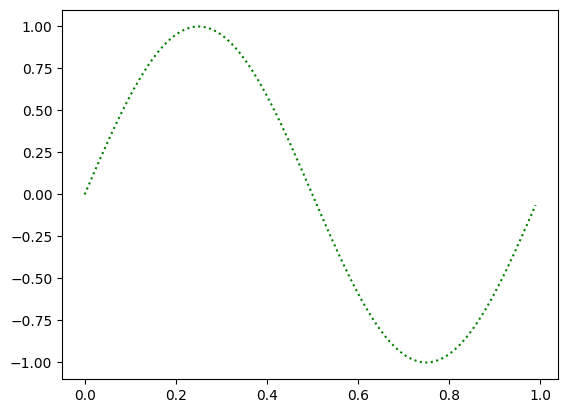

In [5]:
plt.plot(x_all, y_hidden, ':g')

In [6]:
# Definindo a semente do gerador de números aleatórios para garantir a reprodutibilidade
np.random.seed(42)

# Definindo o nível de ruído a ser adicionado aos dados
noise = 0.2

# Definindo o número de amostras
samples = 20

# Criando o dataset
# Gerando 20 valores aleatórios entre 0 e 1 para x
x = np.random.rand(samples)

# Gerando valores y com base na função seno e adicionando ruído
y = np.sin(2 * np.pi * x) + noise * np.random.randn(samples)

# Dividindo o dataset em conjuntos de treino e validação
# 70% dos dados serão usados para treino e 30% para validação
x_train, x_val, y_train, y_val = ms.train_test_split(x, y, test_size=0.3)


- np.random.seed(42) garante que os resultados dos números aleatórios gerados sejam os mesmos todas as vezes que o código é executado, permitindo a reprodutibilidade dos experimentos.
- A variável noise é definida com o valor 0.2, que será utilizado para adicionar ruído aos dados sintéticos.
- y = np.sin(2 * np.pi * x) + noise * np.random.randn(samples) calcula os valores y usando a função seno de 2πx e adiciona um ruído gaussiano (com média 0 e desvio padrão noise) a esses valores. O ruído é introduzido para simular a variabilidade real nos dados.


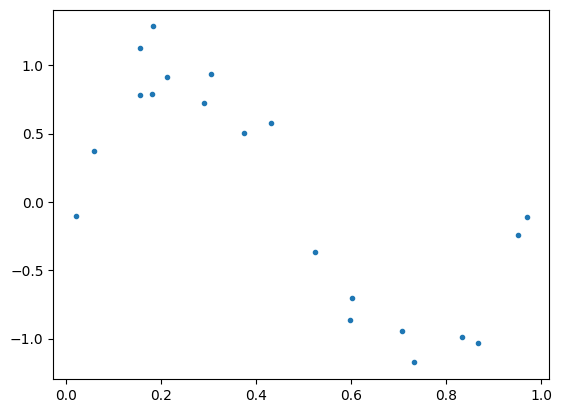

In [7]:
#plt.plot(x_all, y_hidden, ':g')
plt.plot(x, y, '.')

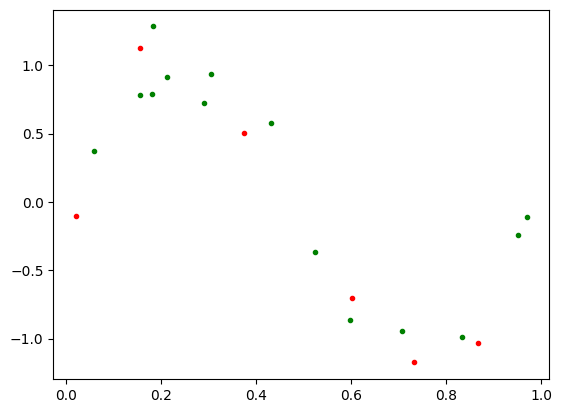

In [8]:
plt.plot(x_train, y_train, '.g')
plt.plot(x_val, y_val, '.r')

# Treinamento    

In [9]:
# Definindo o grau máximo do polinômio a ser ajustado
max_poly_degree = 14

# Criando uma faixa de graus polinomiais de 0 a 13
poly_degrees = range(max_poly_degree)

# Lista para armazenar os modelos polinomiais ajustados
polys = []

# Loop através de cada grau polinomial
for p in poly_degrees:
    # Ajustando um modelo polinomial de grau p aos dados de treino
    poly_model = np.polyfit(x_train, y_train, p)
    
    # Adicionando o modelo ajustado à lista
    polys.append(poly_model)


- poly_model = np.polyfit(x_train, y_train, p) ajusta um polinômio de grau p aos dados de treino (x_train e y_train). np.polyfit retorna os coeficientes do polinômio ajustado

In [10]:
import pandas as pd
pd.DataFrame(polys)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.048389e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.914711e+00,1.080630e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.208170e+00,-4.237229e+00,1.484268e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.541750e+01,-3.762578e+01,1.280406e+01,-2.775613e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.496821e+00,2.842101e+01,-3.957222e+01,1.325635e+01,-3.070884e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-5.593540e+01,1.393298e+02,-9.851868e+01,9.551269e+00,5.633530e+00,3.778409e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-2.904718e+01,3.163856e+01,3.832170e+01,-4.278831e+01,-5.434811e+00,7.395975e+00,-2.613641e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.584202e+03,-5.693606e+03,8.154532e+03,-5.928430e+03,2.333020e+03,-5.034036e+02,5.601939e+01,-1.584522e+00,NaN,NaN,NaN,NaN,NaN,NaN
8,-3.956260e+03,1.823141e+04,-3.476992e+04,3.542135e+04,-2.075339e+04,7.036025e+03,-1.332651e+03,1.274615e+02,-3.710664e+00,NaN,NaN,NaN,NaN,NaN
9,-4.966225e+04,2.330275e+05,-4.618267e+05,5.033453e+05,-3.293389e+05,1.326722e+05,-3.246031e+04,4.552580e+03,-3.188445e+02,8.579746e+00,NaN,NaN,NaN,NaN


In [11]:
polys[2]

array([ 2.20817013, -4.23722907,  1.48426831])

## Erros

In [12]:
# Inicializando arrays para armazenar os RMSEs de treino e validação para cada grau polinomial
rmse_train = np.zeros(max_poly_degree)
rmse_val = np.zeros(max_poly_degree)

# Loop através de cada grau polinomial
for p in poly_degrees:
    # Predizendo sobre o conjunto de treino usando o modelo polinomial de grau p
    yhat_train = np.polyval(polys[p], x_train)
    
    # Calculando o RMSE para o conjunto de treino
    rmse_train[p] = np.sqrt(np.mean(np.square(yhat_train - y_train)))

    # Predizendo sobre o conjunto de validação usando o mesmo modelo polinomial de grau p
    yhat_val = np.polyval(polys[p], x_val)
    
    # Calculando o RMSE para o conjunto de validação
    rmse_val[p] = np.sqrt(np.mean(np.square(yhat_val - y_val)))


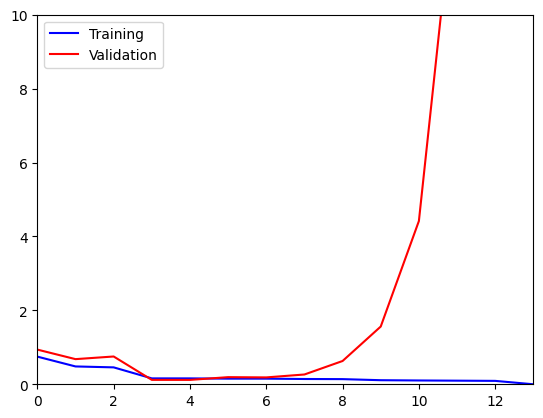

In [13]:
plt.plot(poly_degrees, rmse_train, 'b')
plt.plot(poly_degrees, rmse_val, 'r')
plt.axis((0, max_poly_degree -1, 0, 10) )
plt.legend(['Training', 'Validation'])

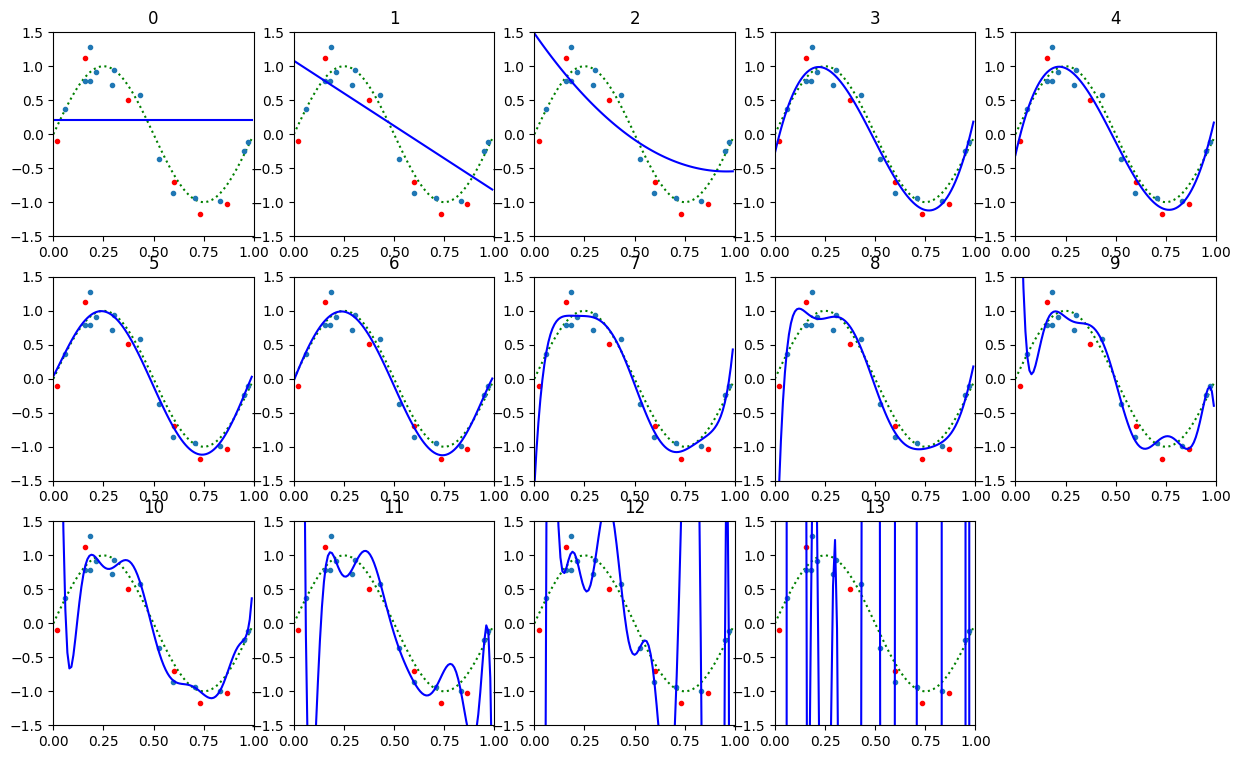

In [14]:
plt.figure( figsize=(15,9) )
for p in poly_degrees:
    plt.subplot(3, 5, p+1)

    y_pol = np.polyval(polys[p], x_all)
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    plt.plot(x_val, y_val, '.r')
    plt.plot( x_all, y_pol, 'b')
    plt.title(p)
    plt.axis((0,1,-1.5, 1.5))

Os gráficos apresentados ilustram a performance de polinômios de graus variados ao ajustar um conjunto de dados sintéticos gerado a partir de uma função senoidal com ruído. Observa-se que polinômios de grau baixo (0-2) são incapazes de capturar a complexidade dos dados, resultando em um ajuste inadequado (underfitting). À medida que o grau dos polinômios aumenta (3-6), o ajuste melhora significativamente, aproximando-se mais da função senoidal original e capturando melhor as variações nos dados de treino e validação. No entanto, a partir do grau 7, os polinômios começam a apresentar um comportamento oscilatório exagerado, especialmente nos graus mais altos (10-13), indicando overfitting. Esses modelos de grau elevado ajustam-se excessivamente aos dados de treino, incluindo o ruído, e não generalizam bem para novos dados, como evidenciado pelas grandes oscilações. Em conclusão, os gráficos demonstram a importância de encontrar um equilíbrio apropriado no grau do polinômio para evitar tanto underfitting quanto overfitting, com graus intermediários proporcionando o melhor desempenho em termos de ajuste aos dados reais sem capturar o ruído excessivamente.